In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("./train.csv",index_col=0)

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
ID,,,,,,,,,,,,,,
328,0.24103,0.0,7.38,0.0,0.493,6.083,43.7,5.4159,5,287.0,19.6,12.79,22.2,396.90
458,8.20058,0.0,18.10,0.0,0.713,5.936,80.3,2.7792,24,666.0,20.2,16.94,13.5,3.50
6,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222.0,18.7,5.21,28.7,394.12
329,0.06617,0.0,3.24,0.0,0.460,5.868,25.8,5.2146,4,430.0,16.9,9.97,19.3,382.44
61,0.14932,25.0,5.13,0.0,0.453,5.741,66.2,7.2254,8,284.0,19.7,13.15,18.7,395.11


In [223]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,230.000000,250.000000
mean,1.209792,13.056000,9.059040,0.105112,0.955923,13.397716,59.882927,5.657884,60.30800,345.012000,38.526560,11.399640,23.723913,343.302160
std,2.363649,22.515761,6.914615,0.277001,1.439184,24.057131,31.834176,5.774066,179.10957,170.971941,81.300054,5.985838,8.500983,116.777081
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.202400,1.00000,20.200000,2.600000,1.920000,11.000000,0.320000
25%,0.051378,0.000000,3.675000,0.000000,0.448000,5.925000,33.575000,2.421700,4.00000,264.000000,17.400000,6.875000,18.700000,376.247500
50%,0.140775,0.000000,6.910000,0.000000,0.520000,6.313500,65.200000,3.866050,5.00000,307.000000,18.900000,10.280000,21.750000,391.305000
75%,0.657123,20.000000,17.335000,0.000000,0.624000,6.857250,88.500000,6.219600,8.00000,403.000000,20.200000,14.767500,27.400000,395.630000
max,9.966540,100.000000,27.740000,1.000000,6.833000,100.000000,100.000000,24.000000,666.00000,711.000000,396.900000,30.810000,50.000000,396.900000


In [8]:
df.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [19]:
y=df["MEDV"].values
x=df.iloc[:,0:12].values

(array([ 25.,   1.,   2.,   0.,   2.,   2.,   0.,   4.,  12., 202.]),
 array([3.20000e-01, 3.99780e+01, 7.96360e+01, 1.19294e+02, 1.58952e+02,
        1.98610e+02, 2.38268e+02, 2.77926e+02, 3.17584e+02, 3.57242e+02,
        3.96900e+02]),
 <a list of 10 Patch objects>)

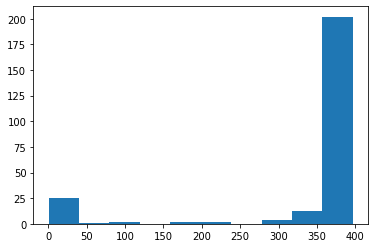

In [54]:
plt.hist(y)

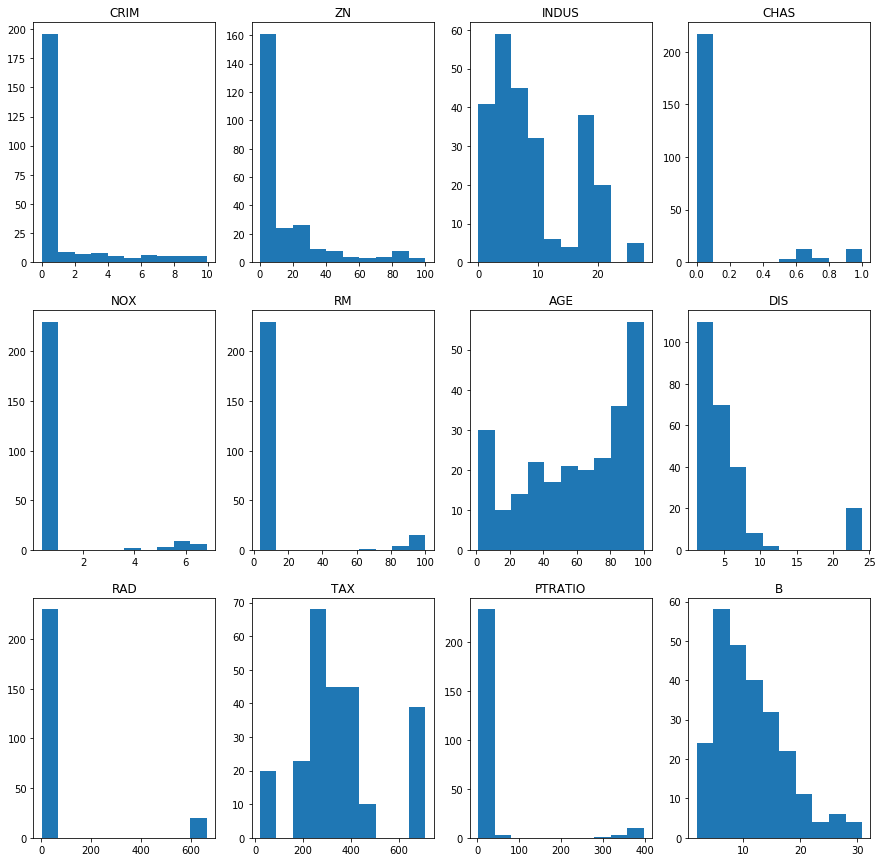

In [22]:
name=df.columns.values
plt.figure(figsize=(15,15))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.hist(x[:,i])
    plt.title(name[i])

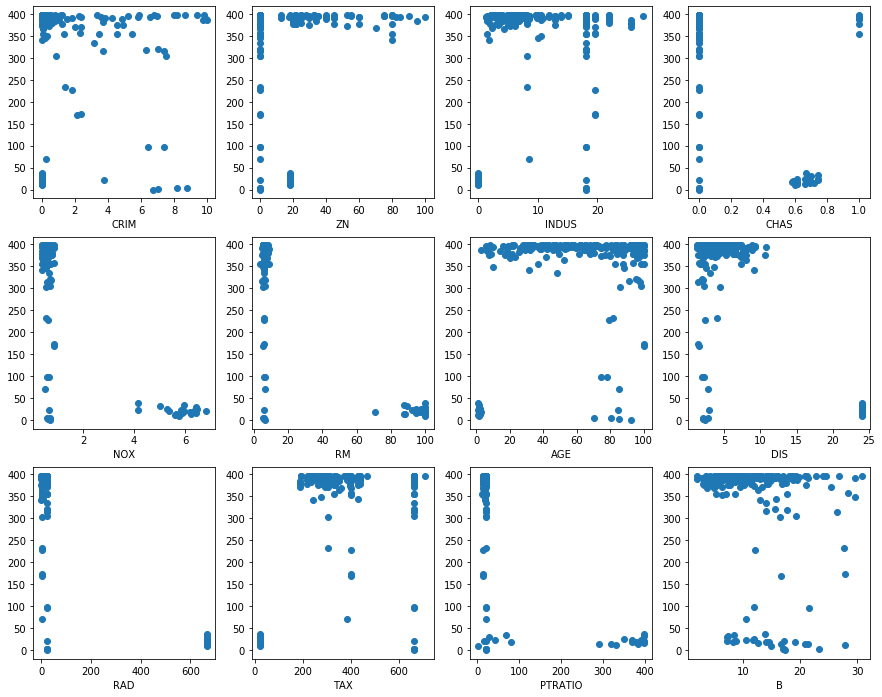

In [24]:
name=df.columns.values
plt.figure(figsize=(15,12))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.scatter(x[:,i],y)
    plt.xlabel(name[i])
    

0.7323629517832196


Text(0.5, 0, 'prediction')

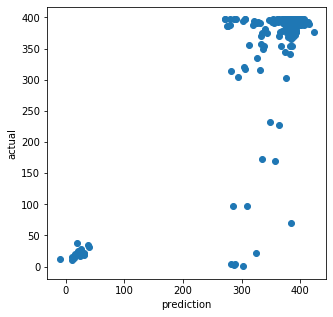

In [199]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

model=LinearRegression()
#model = Lasso()
model.fit(x,y)

#print(model.coef_) 
#print(model.intercept_)
print(model.score(x,y))

ybar=model.predict(x)# predict()で予測値を返します

plt.figure(figsize=(5,5))
plt.scatter(ybar,y)
plt.ylabel("actual")
plt.xlabel("prediction")


In [262]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test=train_test_split(x,y,random_state=0)

model=LinearRegression()
model.fit(x_train,y_train) #学習用データで学習

#print(model.coef_) 
#print(model.intercept_)
print("train:",model.score(x_train,y_train)) #学習用データでのスコア
print("test:",model.score(x_test,y_test)) #検証用データでのスコア


train: 0.7826253845901174
test: 0.5752835559227335


In [279]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test=train_test_split(x,y,random_state=0)

model=KNeighborsRegressor(5) #kにあたる値を指定します
model.fit(x_train,y_train) #学習用データで学習

print("train:",model.score(x_train,y_train)) #学習用データでのスコア
print("test:",model.score(x_test,y_test)) #検証用データでのスコア


train: 0.8713769123504431
test: 0.5531223531356395
